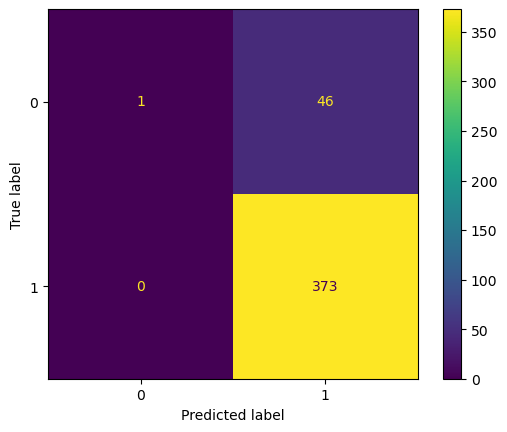

In [3]:
from constants import p

from sklearn.model_selection import GroupKFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

DATASET_PATH = p("result/dataset3.csv")
DF = pd.read_csv(DATASET_PATH)
DF.dropna(inplace=True)


baseline_feats = [col for col in DF.columns if col.startswith("feat_")]
x_all = DF[baseline_feats]
y_all = DF["biopsed"]

x_train, x_test, y_train, y_test = train_test_split(
    x_all,
    y_all,
    test_size=0.3,
    random_state=42
)
gkf = GroupKFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()